# Data- Description:
    
There are 20800 rows × 6 columns in the dataset. The description of each of the column is given below:
    
“id”:  Unique id of each news article
    
“headline”:  It is the title of the news.
    
“news”:  It contains the full text of the news article
    
“Unnamed:0”:  It is a serial number
        
“written_by”:  It represents the author of the news article
    
“label”:  It tells whether the news is fake (1) or not fake (0).


In [119]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [120]:
df=pd.read_csv("C:\\Users\\batha\\Downloads\\train_news.csv")
df

Unnamed: 0     id                                           headline  \
0               0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1               1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2               2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3               3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4               4   7596                       A Digital 9/11 If Trump Wins   
...           ...    ...                                                ...   
20795       20795   5671                                                NaN   
20796       20796  14831        Albert Pike and the European Migrant Crisis   
20797       20797  18142  Dakota Access Caught Infiltrating Protests to ...   
20798       20798  12139  How to Stretch the Summer Solstice - The New Y...   
20799       20799  15660  Emory University to Pay for ’100 Percent’ of U...   

                       written_by  \
0      Eric Lipton and Steve Eder   
1                 David Waldstein   
2                         Pam Key   
3                    Jess Bidgood   
4               Finian Cunningham   
...                           ...   
20795              NeverSurrender   
20796               Rixon Stewart   
20797                 Eddy Lavine   
20798              Alison S. Cohn   
20799                Tom Ciccotta   

                                                    news  label  
0      WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1      HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2      Sunday on ABC’s “This Week,” while discussing ...      0  
3      AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4        Finian Cunningham has written extensively on...      1  
...                                                  ...    ...  
20795  No, you'll be a dog licking of the vomit of yo...      1  
20796  By Rixon Stewart on November 5, 2016 Rixon Ste...      1  
20797  posted by Eddie You know the Dakota Access Pip...      1  
20798  It’s officially summer, and the Society Boutiq...      0  
20799  Emory University in Atlanta, Georgia, has anno...      0  

[20800 rows x 6 columns]

Unnamed column seems like index column so we can remove this column and we can also remove the column id because it is not necessary in ML

In [121]:
df.shape

(20800, 6)

In [122]:
df.columns

Index(['Unnamed: 0', 'id', 'headline', 'written_by', 'news', 'label'], dtype='object')

# Droping the columns

In [123]:
df=df.drop(['Unnamed: 0','id','headline','written_by'],axis=1)
df.head()

news  label
0  WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0
1  HOUSTON  —   Venezuela had a plan. It was a ta...      0
2  Sunday on ABC’s “This Week,” while discussing ...      0
3  AUGUSTA, Me.  —   The beleaguered Republican g...      0
4    Finian Cunningham has written extensively on...      1

# checking the null values

In [124]:
df.isnull().sum()

news     39
label     0
dtype: int64

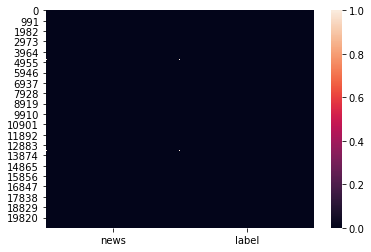

In [125]:
sns.heatmap(df.isnull())

# drop the nan values

In [126]:
df=df.dropna()
df

news  label
0      WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0
1      HOUSTON  —   Venezuela had a plan. It was a ta...      0
2      Sunday on ABC’s “This Week,” while discussing ...      0
3      AUGUSTA, Me.  —   The beleaguered Republican g...      0
4        Finian Cunningham has written extensively on...      1
...                                                  ...    ...
20795  No, you'll be a dog licking of the vomit of yo...      1
20796  By Rixon Stewart on November 5, 2016 Rixon Ste...      1
20797  posted by Eddie You know the Dakota Access Pip...      1
20798  It’s officially summer, and the Society Boutiq...      0
20799  Emory University in Atlanta, Georgia, has anno...      0

[20761 rows x 2 columns]

after droping the nan values there 20761  rows

# reset indexing 

In [127]:
msg=df.copy()

In [128]:
msg.reset_index(inplace=True)

In [129]:
msg.head()

index                                               news  label
0      0  WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0
1      1  HOUSTON  —   Venezuela had a plan. It was a ta...      0
2      2  Sunday on ABC’s “This Week,” while discussing ...      0
3      3  AUGUSTA, Me.  —   The beleaguered Republican g...      0
4      4    Finian Cunningham has written extensively on...      1

drop the earlier index

In [130]:
msg=msg.drop('index',axis=1)
msg.head()

news  label
0  WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0
1  HOUSTON  —   Venezuela had a plan. It was a ta...      0
2  Sunday on ABC’s “This Week,” while discussing ...      0
3  AUGUSTA, Me.  —   The beleaguered Republican g...      0
4    Finian Cunningham has written extensively on...      1

# EDA

0    10387
1    10374
Name: label, dtype: int64


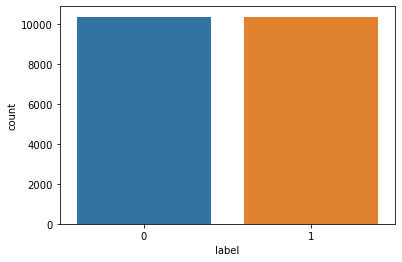

In [131]:
print(df['label'].value_counts())
sns.countplot(x='label',data=msg)
plt.show()

# cleaning the text

In [132]:
import string
msg['news'] = msg['news'].str.lower() #Convert all news to lower case

In [133]:
msg['news']=msg['news'].str.replace(r'[^a-zA-Z]',' ')

In [134]:
msg['news']

0        washington      in sonny perdue s telling  geo...
1        houston      venezuela had a plan  it was a ta...
2        sunday on abc s  this week   while discussing ...
3        augusta  me       the beleaguered republican g...
4          finian cunningham has written extensively on...
                               ...                        
20756    no  you ll be a dog licking of the vomit of yo...
20757    by rixon stewart on november         rixon ste...
20758    posted by eddie you know the dakota access pip...
20759    it s officially summer  and the society boutiq...
20760    emory university in atlanta  georgia  has anno...
Name: news, Length: 20761, dtype: object

tokenization

In [135]:
from nltk.tokenize import word_tokenize
msg['news'] = msg['news'].apply(lambda x: word_tokenize(x))

remove the stopwords

In [136]:
from nltk.corpus import  stopwords
stop_words=stopwords.words('english')
msg['news'] = msg['news'].apply(lambda x: [term for term in x if term not in stop_words])

In [137]:
msg['news']

0        [washington, sonny, perdue, telling, georgians...
1        [houston, venezuela, plan, tactical, approach,...
2        [sunday, abc, week, discussing, republican, pl...
3        [augusta, beleaguered, republican, governor, m...
4        [finian, cunningham, written, extensively, int...
                               ...                        
20756            [dog, licking, vomit, chinese, overlords]
20757    [rixon, stewart, november, rixon, stewart, nov...
20758    [posted, eddie, know, dakota, access, pipeline...
20759    [officially, summer, society, boutique, societ...
20760    [emory, university, atlanta, georgia, announce...
Name: news, Length: 20761, dtype: object

Lemmatization

In [138]:
from nltk.stem.wordnet import WordNetLemmatizer
lem=WordNetLemmatizer()
msg['news'] = msg['news'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x))

In [139]:
msg['news']

0        washington sonny perdue telling georgian growi...
1        houston venezuela plan tactical approach desig...
2        sunday abc week discussing republican plan rep...
3        augusta beleaguered republican governor maine ...
4        finian cunningham written extensively internat...
                               ...                        
20756                   dog licking vomit chinese overlord
20757    rixon stewart november rixon stewart nov migra...
20758    posted eddie know dakota access pipeline prote...
20759    officially summer society boutique society mem...
20760    emory university atlanta georgia announced fun...
Name: news, Length: 20761, dtype: object

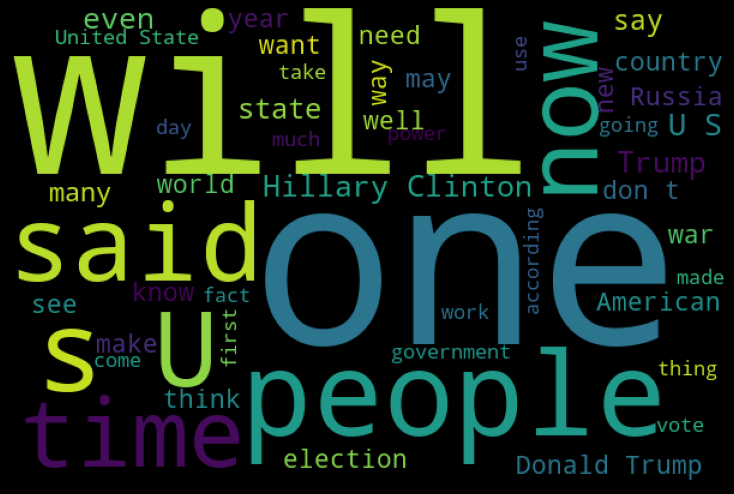

In [140]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
hams = df['news'][df['label']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [141]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
features = tf_vec.fit_transform(msg['news'])
x = features

# input split

In [142]:
x=features
y=msg['label']

# spliting the data

In [143]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# model selection¶

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# LogisticRegression

In [145]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,predlr))
print("\n")
print("confusion matrix: \n \n" ,confusion_matrix(y_test,predlr)) 
print("\n")
print("classification report: \n \n",classification_report(y_test,predlr))

Accuracy score: 0.942692029857934


confusion matrix: 
 
 [[1946  130]
 [ 108 1969]]


classification report: 
 
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      2076
           1       0.94      0.95      0.94      2077

    accuracy                           0.94      4153
   macro avg       0.94      0.94      0.94      4153
weighted avg       0.94      0.94      0.94      4153



# DecisionTreeClassifier¶

In [146]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,preddtc))
print("\n")
print("confusion matrix: \n \n" ,confusion_matrix(y_test,preddtc)) 
print("\n")
print("classification report: \n \n",classification_report(y_test,preddtc))

Accuracy score: 0.8832169516012521


confusion matrix: 
 
 [[1815  261]
 [ 224 1853]]


classification report: 
 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      2076
           1       0.88      0.89      0.88      2077

    accuracy                           0.88      4153
   macro avg       0.88      0.88      0.88      4153
weighted avg       0.88      0.88      0.88      4153



# RandomForestClassifier

In [147]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,predrfc))
print("\n")
print("confusion matrix: \n \n" ,confusion_matrix(y_test,predrfc)) 
print("\n")
print("classification report: \n \n",classification_report(y_test,predrfc))

Accuracy score: 0.9381170238381893


confusion matrix: 
 
 [[1979   97]
 [ 160 1917]]


classification report: 
 
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      2076
           1       0.95      0.92      0.94      2077

    accuracy                           0.94      4153
   macro avg       0.94      0.94      0.94      4153
weighted avg       0.94      0.94      0.94      4153



# KNeighborsClassifier()

In [148]:
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
predkn=kn.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,predkn))
print("\n")
print("confusion matrix: \n \n" ,confusion_matrix(y_test,predkn)) 
print("\n")
print("classification report: \n \n",classification_report(y_test,predkn))

Accuracy score: 0.605345533349386


confusion matrix: 
 
 [[ 460 1616]
 [  23 2054]]


classification report: 
 
               precision    recall  f1-score   support

           0       0.95      0.22      0.36      2076
           1       0.56      0.99      0.71      2077

    accuracy                           0.61      4153
   macro avg       0.76      0.61      0.54      4153
weighted avg       0.76      0.61      0.54      4153



In [150]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,predsvc))
print("\n")
print("confusion matrix: \n \n" ,confusion_matrix(y_test,predsvc)) 
print("\n")
print("classification report: \n \n",classification_report(y_test,predsvc))

Accuracy score: 0.9547315193835781


confusion matrix: 
 
 [[1982   94]
 [  94 1983]]


classification report: 
 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      2076
           1       0.95      0.95      0.95      2077

    accuracy                           0.95      4153
   macro avg       0.95      0.95      0.95      4153
weighted avg       0.95      0.95      0.95      4153



# selecting the best model

In [151]:
import pandas as pd
model_comperison=pd.DataFrame({'Model_Name':['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier','SVC'],
                  'Accuracy Score':[0.9426,0.8832,0.9381,0.6053,0.9547],
                  'f1 score':[0.94,0.88,0.94,0.36,0.95]})
                  
model_comperison

Model_Name  Accuracy Score  f1 score
0      LogisticRegression          0.9426      0.94
1  DecisionTreeClassifier          0.8832      0.88
2  RandomForestClassifier          0.9381      0.94
3    KNeighborsClassifier          0.6053      0.36
4                     SVC          0.9547      0.95

from the above data it is clear that SVC is the best model for Fake news detection project because it has high accuracy,high f1 score and less error.

In [152]:
import joblib
joblib.dump(SVC(),"fakenews.pkl")

['fakenews.pkl']